In [1]:
import nltk
import pandas as pd
import numpy as np
import requests
import networkx as nx
import re
import matplotlib.pyplot as plt
import os
import pickle
from nltk.stem import WordNetLemmatizer

C:\Users\Lachl\AppData\Roaming\Python\Python39\site-packages\networkx\utils\backends.py:135: RuntimeWarning: networkx backend defined more than once: nx-loopback
  backends.update(_get_backends("networkx.backends"))


In [2]:
# Load Game_of_Thrones_Script.csv
df = pd.read_csv('Game_of_Thrones_Script.csv', header=0, encoding='utf-8-sig')
sentiment_doc = pd.read_csv('Data_Set_S1.txt', header=2, encoding='utf-8-sig', sep='\t')

print(df.head())

# Collect all the unique characters
characters = df['Name'].unique().tolist()

# Collect all unique episode titles
episodes = df['Episode Title'].unique().tolist()

# Collect all season numbers
seasons = df['Season'].unique().tolist()

print(seasons)

  Release Date    Season    Episode     Episode Title          Name  \
0   2011-04-17  Season 1  Episode 1  Winter is Coming  waymar royce   
1   2011-04-17  Season 1  Episode 1  Winter is Coming          will   
2   2011-04-17  Season 1  Episode 1  Winter is Coming  waymar royce   
3   2011-04-17  Season 1  Episode 1  Winter is Coming          will   
4   2011-04-17  Season 1  Episode 1  Winter is Coming         gared   

                                            Sentence  
0  What do you expect? They're savages. One lot s...  
1  I've never seen wildlings do a thing like this...  
2                             How close did you get?  
3                            Close as any man would.  
4                   We should head back to the wall.  
['Season 1', 'Season 2', 'Season 3', 'Season 4', 'Season 5', 'Season 6', 'Season 7', 'Season 8']


In [93]:
# Create an empty list to collect all the lines said by each character per episode
lemmatizer = WordNetLemmatizer()
lines = []

# Create a for loop to loop through each character
for character in characters:
    # Create a temporary list to store the lines said by each character per episode
    character_lines = []
    # Create a for loop to loop through each episode
    for episode in seasons:
        # Create a temporary list to store the lines said by each character per episode
        episode_lines = []
        # Create a temporary dataframe to store the lines said by each character per episode
        temp_df = df[(df['Name'] == character) & (df['Season'] == episode)]
        # Create a for loop to loop through each line
        for line in temp_df['Sentence']:
            # Append the line to the temporary list
            episode_lines.append(line)
        # Append the temporary list to the temporary list
        episode_lines = ([lemmatizer.lemmatize(word) for word in episode_lines])
        character_lines.append(episode_lines)
    
    # Append the temporary list to the list
    lines.append(character_lines)

In [ ]:
print(lines[4])

[["Go on. Father's watching.", 'And your mother.', "Don't think too much, Bran.", "Don't look away.", 'Father will know if you do.', 'You did well.', 'What is it?', 'Now there are five.', 'You want to hold it?', 'Lord Stark? There are five pups. One for each of the Stark children. The direwolf is the sigil of your House. They were meant to have them.', "I'm not a Stark. Get on.", "Why's your mother so dead-set on us getting pretty for the king?", 'Uncle Benjen!', 'Lady Stark thought it might insult the royal family to seat a bastard in their midst.', 'So take me with you when you go back.', 'Father will let me if you ask him, I know he will.', "I'm ready to swear your oath.", "I don't care about that.", "What're you doing back there?", "You're Tyrion Lannister. The queen's brother?", 'Lord Eddard Stark is my father.', 'What the hell do you know about being a bastard?', 'I already have one.', 'Of course I have.', "We've guarded the Kingdoms for 8 000 years.", 'Soon enough.', "It's good 

In [57]:
# Save the list as a pickle file
with open('lines.pkl', 'wb') as f:
    pickle.dump(lines, f)

In [3]:
# Open the pickle file
with open('lines.pkl', 'rb') as f:
    lines = pickle.load(f)

In [8]:
# Create an empty list to collect all the lines said by each character per episode
lines_split = []

lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

# Lowercase all the words in the list and remove punctuation. Lemmatize the words.
# Store the amount of words said by each character in total in a list
for character in lines:
    character_lines = []
    for episode in character:
        episode_lines = []
        for line in episode:
            line = line.lower()
            line = re.sub(r'[^\w\s]', '', line)
            line = ([word for word in line.split() if word not in stopwords])
            line = ([lemmatizer.lemmatize(word) for word in line])
            episode_lines.append(line)
        character_lines.append(episode_lines)
    lines_split.append(character_lines)

In [10]:
# For each character, get the sentiment score for each season
# Create an empty list to store the sentiment scores
character_sentiment = np.zeros((len(characters), len(seasons)))

# Create a for loop to loop through each character
for i in range(len(characters)):
    # Create a for loop to loop through each season
    for j in range(len(seasons)):
        for k in range(len(lines_split[i][j])):
            for l in range(len(lines_split[i][j][k])):
                # Create a temporary dataframe to store the sentiment score of each word
                temp_df = sentiment_doc[sentiment_doc['word'] == lines_split[i][j][k][l]]
                # If the word is in the sentiment_doc, add the sentiment score to the character_sentiment
                if len(temp_df) > 0:
                    character_sentiment[i][j] += temp_df['happiness_average'].values[0]/len(lines_split[i][j]) # Happiness average of the word / words per season


In [14]:
# Save the character_sentiment as a pickle file
with open('character_sentiment.pkl', 'wb') as f:
    pickle.dump(character_sentiment, f)

In [4]:
# Open the pickle file
with open('character_sentiment.pkl', 'rb') as f:
    character_sentiment = pickle.load(f)

In [11]:
print(character_sentiment[4])

[19.55786765 15.72639175 20.31241758 27.76514493 31.11814815 25.98213675
 28.91041152 19.82677852]


In [62]:
chars = ["Tyrion Lannister", "Jaime Lannister", "Tywin Lannister", "Stannis Baratheon", "Daenarys Targarian", "Jon Snow", "Arya Stark", "Sansa Stark", "Robb Stark", "Bran Stark"]
args = [characters.index(char.lower()) for char in chars]
print(args) 

sentis = [character_sentiment[arg] for arg in args]
print(sentis)

[20, 14, 89, 164, 4, 18, 6, 8, 12]
[array([38.37372642, 30.24939481, 29.03145228, 33.359     , 38.08535135,
       35.51160494, 36.6118617 , 33.49676923]), array([35.38738095, 37.86347222, 36.0124031 , 23.70416667, 22.08563107,
       30.36881356, 26.14877907, 18.9491954 ]), array([24.03942857, 33.32141304, 36.64085106, 30.1791875 ,         nan,
               nan,         nan,         nan]), array([        nan, 30.89868132, 22.38322581, 20.32942857, 32.10648148,
               nan,         nan,         nan]), array([19.55786765, 15.72639175, 20.31241758, 27.76514493, 31.11814815,
       25.98213675, 28.91041152, 19.82677852]), array([17.49019608, 13.80574803, 15.92990385, 17.00519608, 19.55012658,
       15.60416667, 29.26645669, 14.32512195]), array([17.23353535, 18.97518072, 22.91137931, 25.76958763, 15.55989583,
       27.91226087, 25.64144737, 25.39072727]), array([22.30205128, 29.02883721, 26.72555556,         nan,         nan,
               nan,         nan,         nan]), arra

In [63]:
lists_of_char = [
    {
        'Name': 'Tyrion Lannister',
        'Rank': sentis[0],
        'Color': 'red'
    },
    {
        'Name': 'Jaime Lannister',
        'Rank': sentis[1],
        'Color': 'blue'
    },
    {
        'Name': 'Tywin Lannister',
        'Rank': sentis[2],
        'Color': 'green'
    },
    {
        'Name': 'Stannis Baratheon',
        'Rank': sentis[3],
        'Color': 'cyan'
    },
    {
        'Name': 'Jon Snow',
        'Rank': sentis[4],
        'Color': 'orange'
    },
    {
        'Name': 'Arya Stark',
        'Rank': sentis[5],
        'Color': 'purple'
    },
    {
        'Name': 'Sansa Stark',
        'Rank': sentis[6],
        'Color': 'brown'
    },
    {
        'Name': 'Robb Stark',
        'Rank': sentis[7],
        'Color': 'pink'
    },
    {
        'Name': 'Bran Stark',
        'Rank': sentis[8],
        'Color': 'grey'
    }
]

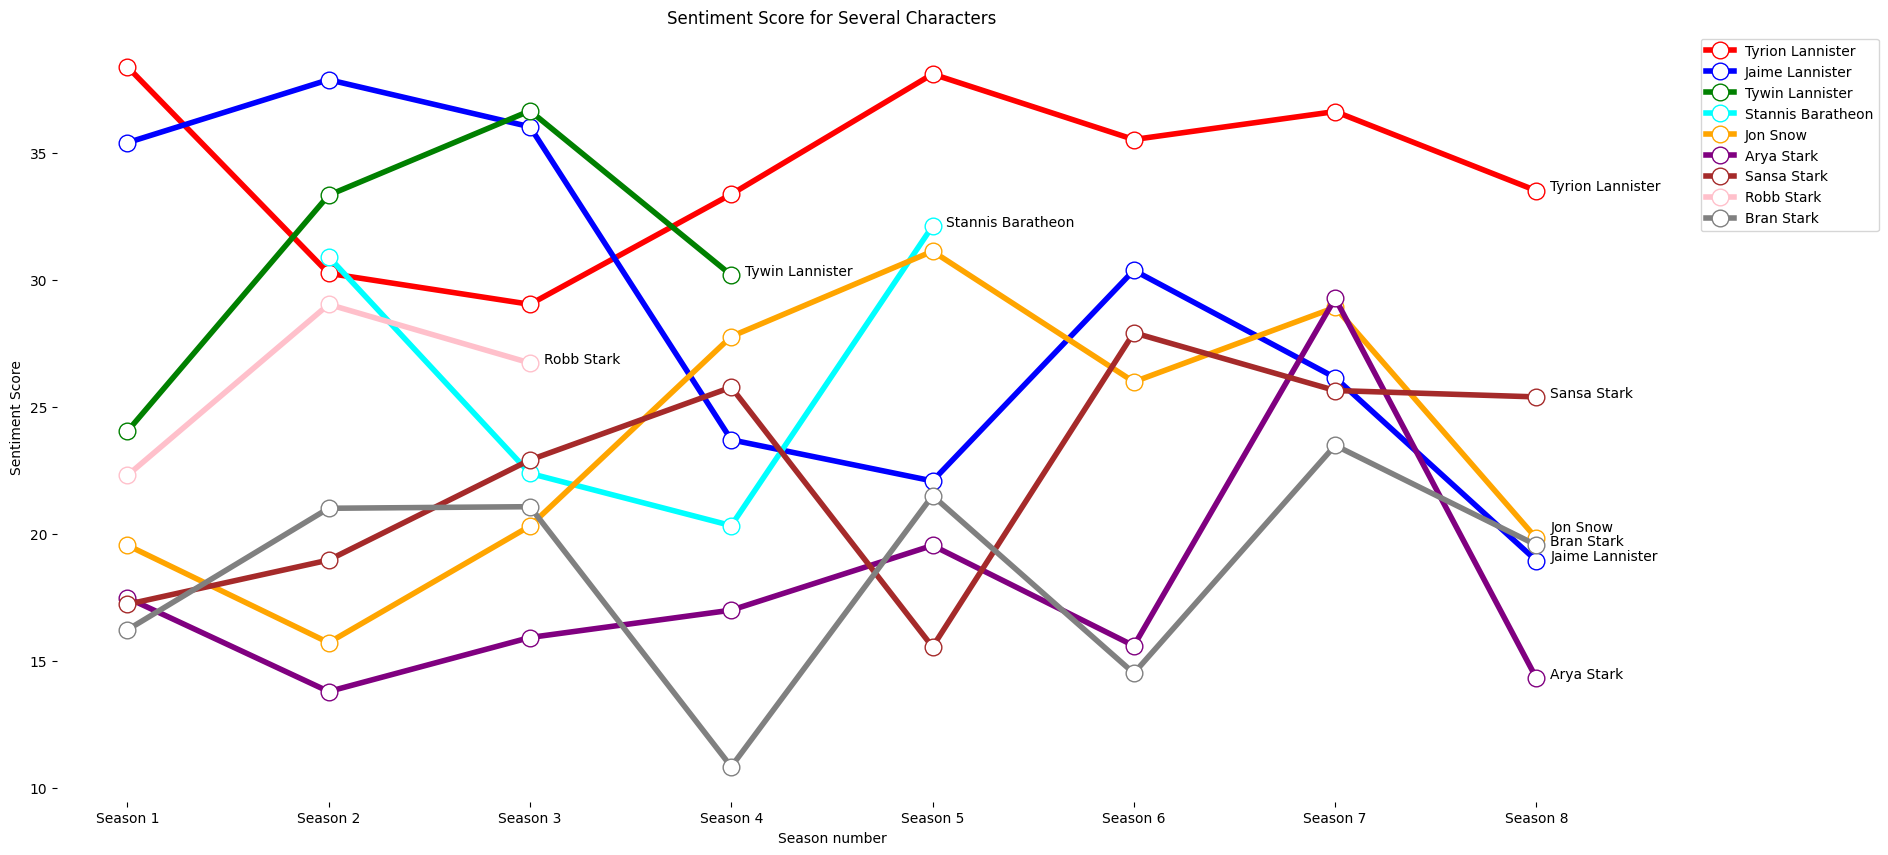

In [70]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (20,100)

for element in lists_of_char:
    # if element is either 0 or inf, set it to nan
    element['Rank'][element['Rank'] == 0] = np.nan
    ax.plot(seasons, element['Rank'], label=element['Name'], marker='o', markerfacecolor='white', markersize=12, color=element['Color'], linewidth=4)
    # Remove elements with sentiment score of 0
    xy = (7, element['Rank'][-1])
    # If element has a sentiment score of nan, set xy to the previous element that is not nan
    if np.isnan(xy[1]):
        for i in range(len(element['Rank'])-1, -1, -1):
            if not np.isnan(element['Rank'][i]):
                xy = (i, element['Rank'][i])
                break
    
    xytext = (10, 0)
    if element['Name'] == 'Jon Snow':
        xytext = (10, 5)

    ax.annotate(element['Name'], xy=xy, xytext=xytext, textcoords='offset points')

for spine in ax.spines.values():
    spine.set_visible(False)

plt.ylabel('Sentiment Score')
plt.xlabel('Season number')
plt.title('Sentiment Score for Several Characters')
plt.legend(loc = 'upper right' , bbox_to_anchor = (1.18, 1))
plt.show()

In [51]:
common = []

for i in range(100):
    common.append(dist.most_common(100)[i][0])

print(common)

# Find sentiment score of the most common words
# Create an empty list to store the sentiment scores
tyrion_sentiment = np.zeros(len(common))

# Create a for loop to loop through each word
for i in range(len(common)):
    # Create a temporary dataframe to store the sentiment score of each word
    temp_df = sentiment_doc[sentiment_doc['word'] == common[i]]
    # If the word is in the sentiment_doc, add the sentiment score to the character_sentiment
    if len(temp_df) > 0:
        tyrion_sentiment[i] += temp_df['happiness_average'].values[0]

print(tyrion_sentiment.mean())

dont
['im', 'know', 'dont', 'one', 'king', 'father', 'youre', 'would', 'want', 'well', 'like', 'good', 'time', 'man', 'yes', 'men', 'think', 'queen', 'see', 'people', 'need', 'right', 'never', 'tell', 'could', 'say', 'city', 'lady', 'lord', 'going', 'u', 'come', 'make', 'sister', 'get', 'hand', 'thats', 'oh', 'thing', 'cant', 'lannister', 'brother', 'world', 'didnt', 'life', 'believe', 'l', 'better', 'take', 'ive', 'course', 'always', 'let', 'army', 'long', 'there', 'ever', 'love', 'find', 'go', 'much', 'even', 'nothing', 'youve', 'ser', 'kill', 'told', 'back', 'stark', 'jaime', 'child', 'many', 'give', 'look', 'must', 'day', 'great', 'might', 'friend', 'war', 'dragon', 'daenerys', 'girl', 'family', 'wall', 'killed', 'doesnt', 'way', 'cersei', 'wont', 'something', 'id', 'he', 'grace', 'hear', 'landing', 'enough', 'last', 'shes', 'son']
5.272200000000001


ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of labels (9).

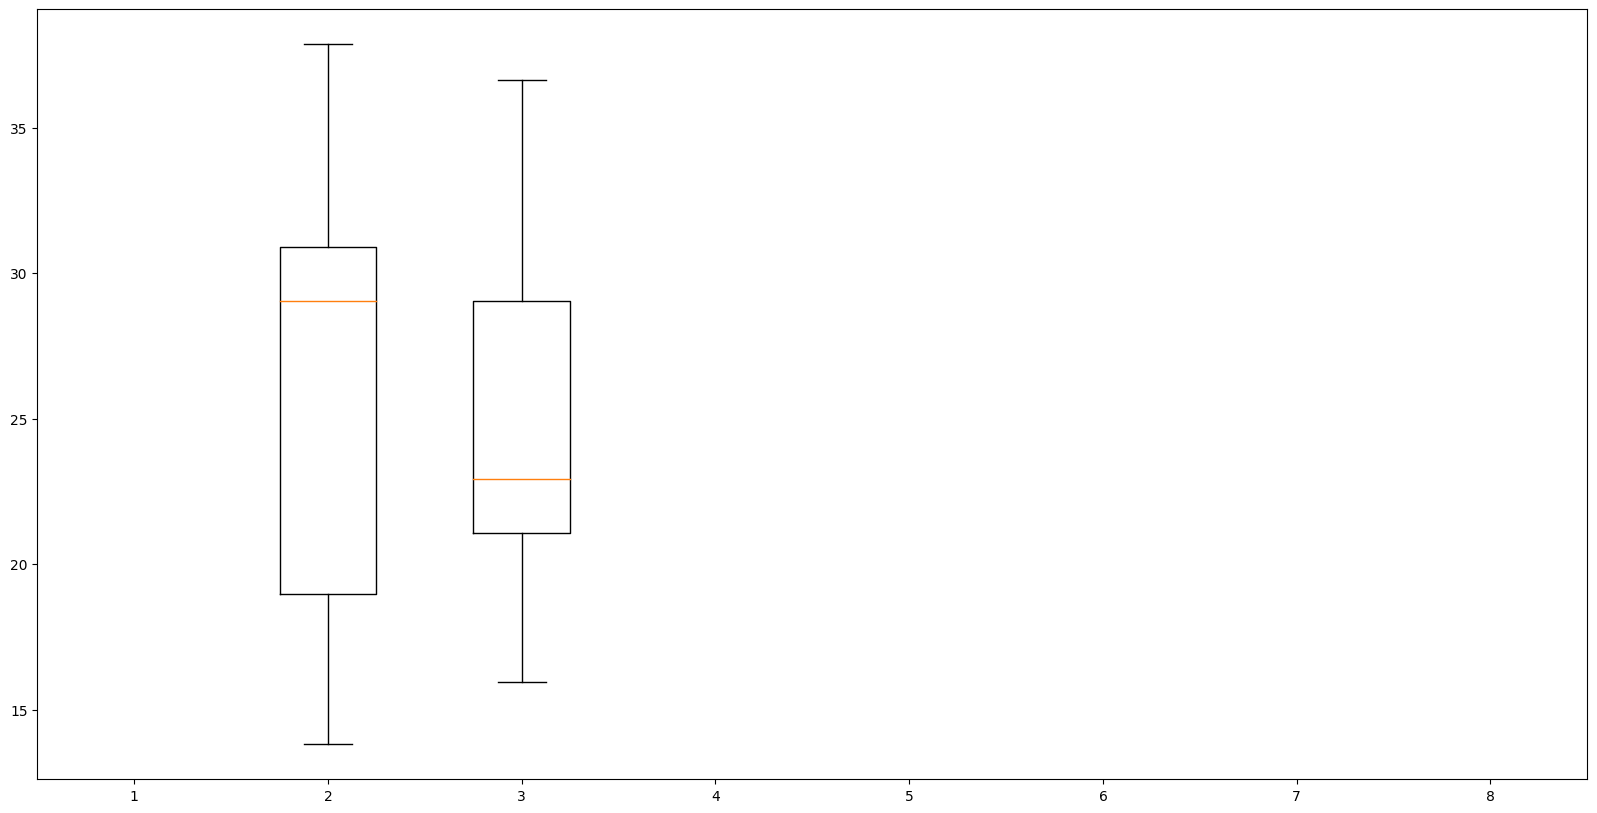

<Figure size 2000x1000 with 0 Axes>

In [53]:
# Create boxplots for the sentiment scores of each of the 10 characters
fig, ax = plt.subplots()
plt.figure(figsize=(20,10))
ax.boxplot(character_sentiment[args])
ax.set_xticklabels(chars)
plt.ylabel('Sentiment Score')
plt.xlabel('Character')
plt.title('Sentiment Score for Several Characters')
plt.show()